## Travel Reviews Data  Set https://archive.ics.uci.edu/ml/datasets/Travel+Reviews
### _Abstract: Reviews on destinations in 10 categories mentioned across East Asia. Each traveler rating is mapped as Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0) and average rating is used._

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file_name = 'tripadvisor_review.csv'
full_data_frame = pd.read_csv(data_file_name)

In [3]:
full_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
User ID        980 non-null object
Category 1     980 non-null float64
Category 2     980 non-null float64
Category 3     980 non-null float64
Category 4     980 non-null float64
Category 5     980 non-null float64
Category 6     980 non-null float64
Category 7     980 non-null float64
Category 8     980 non-null float64
Category 9     980 non-null float64
Category 10    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [4]:
full_data_frame.head(10)

User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0   User 1        0.93        1.80        2.29        0.62        0.80   
1   User 2        1.02        2.20        2.66        0.64        1.42   
2   User 3        1.22        0.80        0.54        0.53        0.24   
3   User 4        0.45        1.80        0.29        0.57        0.46   
4   User 5        0.51        1.20        1.18        0.57        1.54   
5   User 6        0.99        1.28        0.72        0.27        0.74   
6   User 7        0.90        1.36        0.26        0.32        0.86   
7   User 8        0.74        1.40        0.22        0.41        0.82   
8   User 9        1.12        1.76        1.04        0.64        0.82   
9  User 10        0.70        1.36        0.22        0.26        1.50   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54  
5        1.26        3.17        2.89        1.66         3.66  
6        1.58        3.17        2.66        1.22         3.22  
7        1.50        3.17        2.81        1.54         2.88  
8        2.14        3.18        2.79        1.41         2.54  
9        1.54        3.17        2.82        2.24         3.12

In [5]:
full_data_frame.describe().T

count      mean       std   min   25%   50%     75%   max
Category 1   980.0  0.893194  0.326912  0.34  0.67  0.83  1.0200  3.22
Category 2   980.0  1.352612  0.478280  0.00  1.08  1.28  1.5600  3.64
Category 3   980.0  1.013306  0.788607  0.13  0.27  0.82  1.5725  3.62
Category 4   980.0  0.532500  0.279731  0.15  0.41  0.50  0.5800  3.44
Category 5   980.0  0.939735  0.437430  0.06  0.64  0.90  1.2000  3.30
Category 6   980.0  1.842898  0.539538  0.14  1.46  1.80  2.2000  3.76
Category 7   980.0  3.180939  0.007824  3.16  3.18  3.18  3.1800  3.21
Category 8   980.0  2.835061  0.137505  2.42  2.74  2.82  2.9100  3.39
Category 9   980.0  1.569439  0.364629  0.74  1.31  1.54  1.7600  3.17
Category 10  980.0  2.799224  0.321380  2.14  2.54  2.78  3.0400  3.66

## Attribute Information:

__This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.__

| name | description |
| -- | -- |
| Attribute 1 | Unique user id |
| Attribute 2 | Average user feedback on art galleries |
| Attribute 3 | Average user feedback on dance clubs |
| Attribute 4 | Average user feedback on juice bars |
| Attribute 5 | Average user feedback on restaurants |
| Attribute 6 | Average user feedback on museums |
| Attribute 7 | Average user feedback on resorts |
| Attribute 8 | Average user feedback on parks/picnic spots |
| Attribute 9 | Average user feedback on beaches |
| Attribute 10 | Average user feedback on theaters |
| Attribute 11 | Average user feedback on religious institutions |

## Для удобства анализ переименуем параметры...

In [6]:
full_data_frame.columns = ['User ID',
                      'Galleries', 'Clubs', 'Bars', 'Restaurants', 'Museums',
                      'Resorts', 'Parks', 'Beaches', 'Theatres', 'Institutions']

## 1. Анализ и подготовка данных

## Отсутсвующих значений нет

In [7]:
full_data_frame.count()

User ID         980
Galleries       980
Clubs           980
Bars            980
Restaurants     980
Museums         980
Resorts         980
Parks           980
Beaches         980
Theatres        980
Institutions    980
dtype: int64

## Корреляция параметров

In [8]:
corr_matrix = full_data_frame.corr()

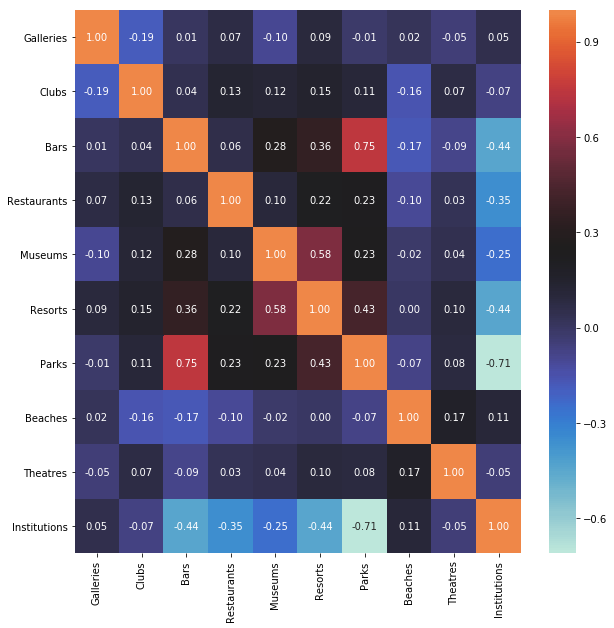

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', center = 0.25)

In [10]:
full_data_frame['Parks'].value_counts()

3.18    581
3.19    167
3.17    164
3.20     55
3.16     12
3.21      1
Name: Parks, dtype: int64

### Параметр Parks следует отнести к категориальным: он принимает лишь 6 различных значений.
### Параметр User ID удалим.

In [11]:
processed_data = full_data_frame.drop('User ID', axis=1)

In [12]:
numerical_parameters = processed_data.columns.to_list()
numerical_parameters.remove('Parks')

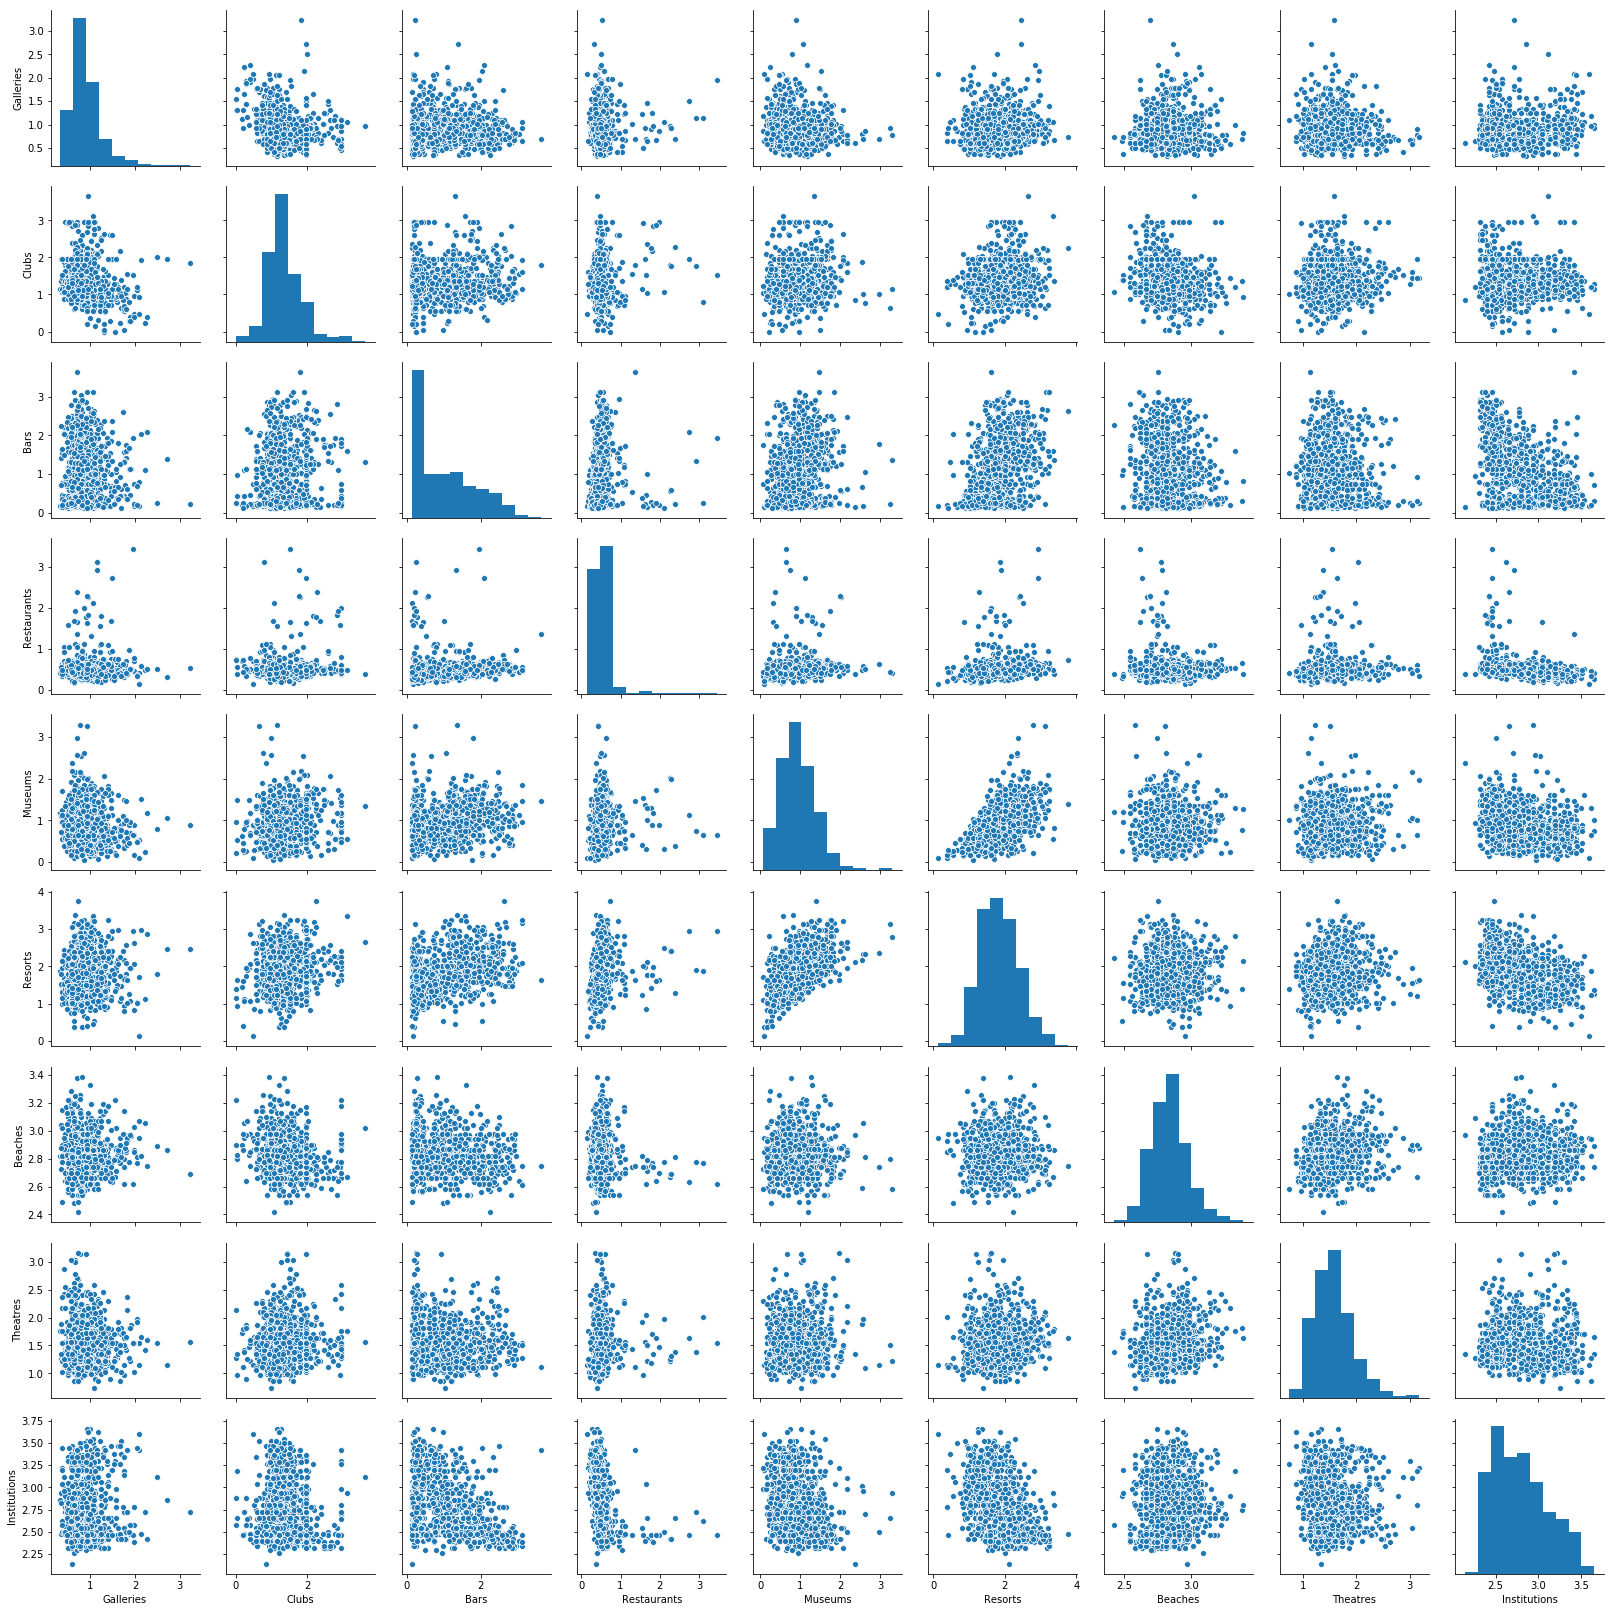

In [13]:
sns.pairplot(data=processed_data[numerical_parameters])

### Значительной корреляции между параметрами не выявлено.

## Выбросы

In [14]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [15]:
def multi_mean_std_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_mean_std(data, col, threshold)        
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [16]:
outlier_indices, outlier_info = multi_mean_std_outlier(processed_data, numerical_parameters, threshold=3)
outlier_info.T.sort_values(by='outliers_total', ascending=False)

upper_fence  lower_fence  outliers_total  outliers_relative
Clubs            2.787453    -0.082228            21.0           0.021429
Restaurants      1.371694    -0.306694            20.0           0.020408
Galleries        1.873931    -0.087543            17.0           0.017347
Theatres         2.663327     0.475550            10.0           0.010204
Museums          2.252025    -0.372555             7.0           0.007143
Beaches          3.247578     2.422545             7.0           0.007143
Resorts          3.461512     0.224284             2.0           0.002041
Bars             3.379127    -1.352515             1.0           0.001020
Institutions     3.763364     1.835085             0.0           0.000000

In [17]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data) / len(numerical_parameters))

Общее количество выбросов:  79
Общий процент выбросов:  0.8956916099773243


In [18]:
def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [19]:
def multi_IQR_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    outlier_list_index = []
    for col in columns:        
        index, fences = outlier_detect_IQR(data, col, threshold)
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_list_index.append(index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df, outlier_list_index

In [20]:
outlier_indices, outlier_info, outlier_index_list = multi_IQR_outlier(processed_data, numerical_parameters, threshold=3)
outlier_info.T.sort_values(by='outliers_total', ascending=False)

upper_fence  lower_fence  outliers_total  outliers_relative
Restaurants          1.09      -0.1000            28.0           0.028571
Galleries            2.07      -0.3800             8.0           0.008163
Museums              2.88      -1.0400             3.0           0.003061
Theatres             3.11      -0.0400             3.0           0.003061
Clubs                3.00      -0.3600             2.0           0.002041
Bars                 5.48      -3.6375             0.0           0.000000
Resorts              4.42      -0.7600             0.0           0.000000
Beaches              3.42       2.2300             0.0           0.000000
Institutions         4.54       1.0400             0.0           0.000000

In [21]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / len(processed_data) / len(numerical_parameters))

Общее количество выбросов:  44
Общий процент выбросов:  0.4988662131519274


### Общая доля выбросов небольшая - менее 1%, в некоторых параметрах доля выбросов составляет 2-3%%. Будем считать её приемлемой.

### Закодируем значения параметра Category 7 целочисленными значениями.

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(processed_data['Parks'])

In [23]:
processed_data['Parks'] = encoder.transform(processed_data['Parks'])
processed_data['Parks'].value_counts()

2    581
3    167
1    164
4     55
0     12
5      1
Name: Parks, dtype: int64

In [24]:
 unprocessed_data = full_data_frame.drop('User ID', axis=1)

## Масштабирование данных

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [27]:
scaled_data = pd.DataFrame(data=std_scaler.fit_transform(processed_data), columns=processed_data.columns)
scaled_data.describe().T

count          mean       std       min       25%       50%  \
Galleries     980.0 -3.721513e-17  1.000511 -1.693043 -0.683082 -0.193404   
Clubs         980.0  6.389447e-17  1.000511 -2.829519 -0.570275 -0.151897   
Bars          980.0 -7.604461e-17  1.000511 -1.120656 -0.943037 -0.245249   
Restaurants   980.0  5.140021e-16  1.000511 -1.368082 -0.438144 -0.116242   
Museums       980.0 -5.437827e-17  1.000511 -2.012171 -0.685567 -0.090883   
Resorts       980.0  1.852260e-16  1.000511 -3.157826 -0.710040 -0.079549   
Parks         980.0  1.872368e-16  1.000511 -2.677437 -0.120041 -0.120041   
Beaches       980.0 -1.572665e-15  1.000511 -3.020048 -0.691680 -0.109588   
Theatres      980.0 -2.381315e-16  1.000511 -2.275906 -0.711877 -0.080777   
Institutions  980.0 -9.017730e-16  1.000511 -2.052279 -0.807010 -0.059849   

                   75%        max  
Galleries     0.388088   7.121160  
Clubs         0.433833   4.784969  
Bars          0.709453   3.307129  
Restaurants   0.169892  10.399209  
Museums       0.595291   5.398511  
Resorts       0.662204   3.555043  
Parks        -0.120041   3.716053  
Beaches       0.545266   4.037818  
Theatres      0.522883   4.391797  
Institutions  0.749576   2.679742

In [28]:
normalized_data = pd.DataFrame(data=minmax_scaler.fit_transform(processed_data), columns=processed_data.columns)
normalized_data.describe().T

count      mean       std  min       25%       50%       75%  \
Galleries     980.0  0.192081  0.113511  0.0  0.114583  0.170139  0.236111   
Clubs         980.0  0.371597  0.131396  0.0  0.296703  0.351648  0.428571   
Bars          980.0  0.253096  0.225962  0.0  0.040115  0.197708  0.413324   
Restaurants   980.0  0.116261  0.085025  0.0  0.079027  0.106383  0.130699   
Museums       980.0  0.271523  0.135009  0.0  0.179012  0.259259  0.351852   
Resorts       980.0  0.470414  0.149044  0.0  0.364641  0.458564  0.569061   
Parks         980.0  0.418776  0.156489  0.0  0.400000  0.400000  0.400000   
Beaches       980.0  0.427898  0.141758  0.0  0.329897  0.412371  0.505155   
Theatres      980.0  0.341333  0.150053  0.0  0.234568  0.329218  0.419753   
Institutions  980.0  0.433700  0.211434  0.0  0.263158  0.421053  0.592105   

              max  
Galleries     1.0  
Clubs         1.0  
Bars          1.0  
Restaurants   1.0  
Museums       1.0  
Resorts       1.0  
Parks         1.0  
Beaches       1.0  
Theatres      1.0  
Institutions  1.0

## 2. Подбор параметров моделей кластеризации

## K-Means

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [30]:
X = scaled_data

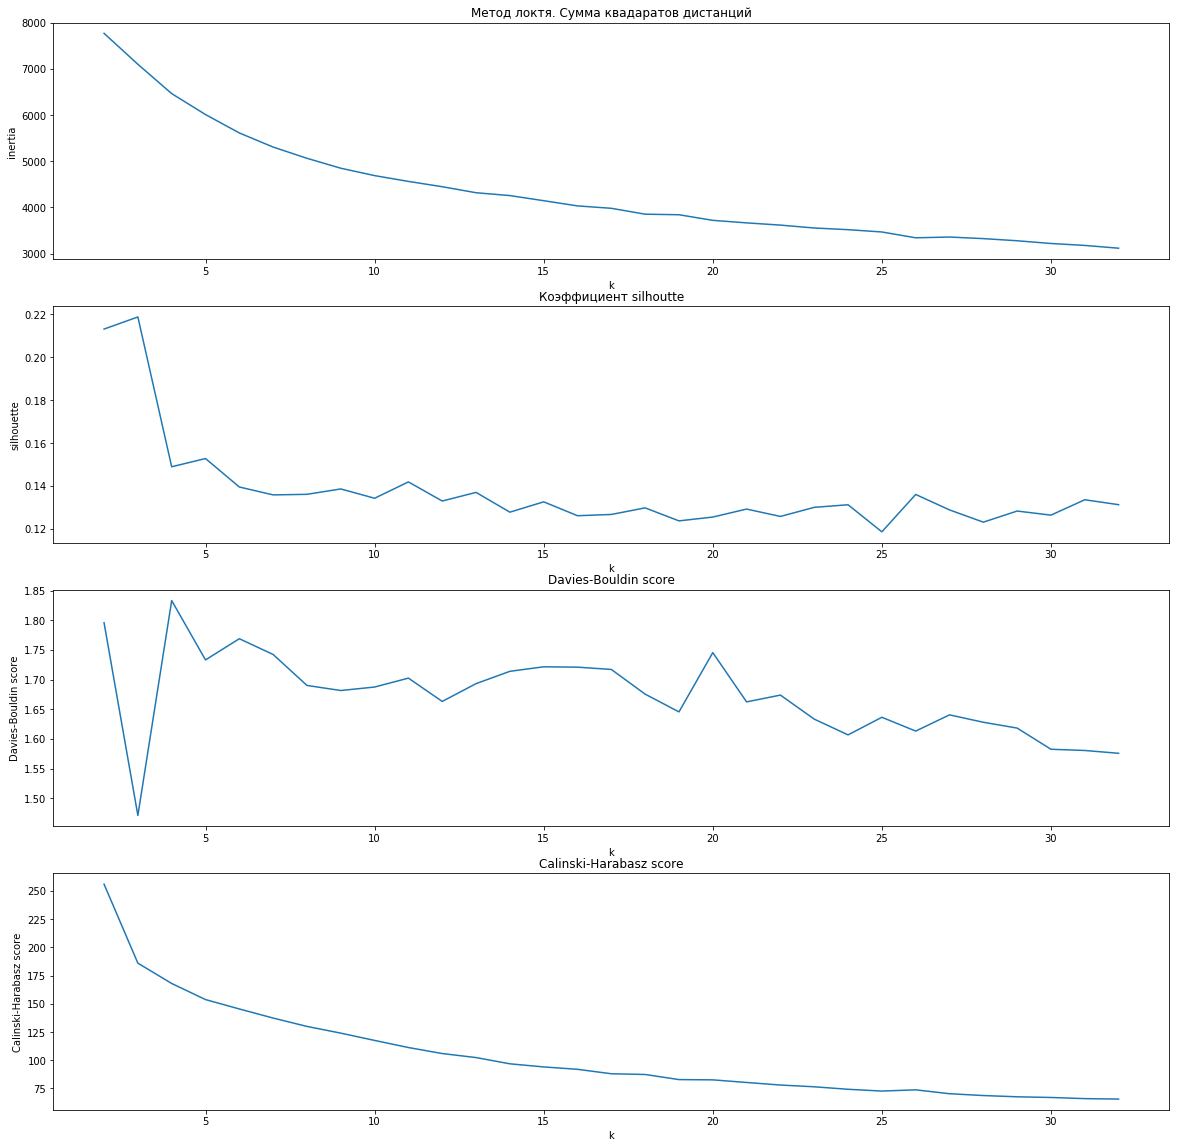

In [31]:
silhouette_array = []
inertia_array = []
davies_bouldin_array = []
calinski_harabasz_array = []

range_n_clusters = range(2, 33)

for k in range_n_clusters:
    clusterer = KMeans(n_clusters=k, random_state=1812+k, init='k-means++')
    labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    dvs_bldn_csore = davies_bouldin_score(X, labels)
    clnsk_hrb_score = calinski_harabasz_score(X, labels)
    
    silhouette_array.append(silhouette_avg)
    inertia_array.append(clusterer.inertia_)    
    davies_bouldin_array.append(dvs_bldn_csore)
    calinski_harabasz_array.append(clnsk_hrb_score)
    
    #print("Для k =", k,
    #      "Средний коэффициент silhouette:", silhouette_avg,
    #      ", сумма квадратов дистанций :", clusterer.inertia_
    #     )
    
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.set_size_inches(20, 20)

ax1.plot(range_n_clusters, inertia_array)
ax1.set_xlabel('k')
ax1.set_ylabel('inertia')
ax1.set_title('Метод локтя. Сумма квадаратов дистанций')

ax2.plot(range_n_clusters, silhouette_array)
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette')
ax2.set_title('Коэффициент silhoutte')

ax3.plot(range_n_clusters, davies_bouldin_array)
ax3.set_xlabel('k')
ax3.set_ylabel('Davies-Bouldin score')
ax3.set_title('Davies-Bouldin score')

ax4.plot(range_n_clusters, calinski_harabasz_array)
ax4.set_xlabel('k')
ax4.set_ylabel('Calinski-Harabasz score')
ax4.set_title('Calinski-Harabasz score')

plt.show()

## Иерархическая кластеризация

In [32]:
from sklearn.cluster import AgglomerativeClustering

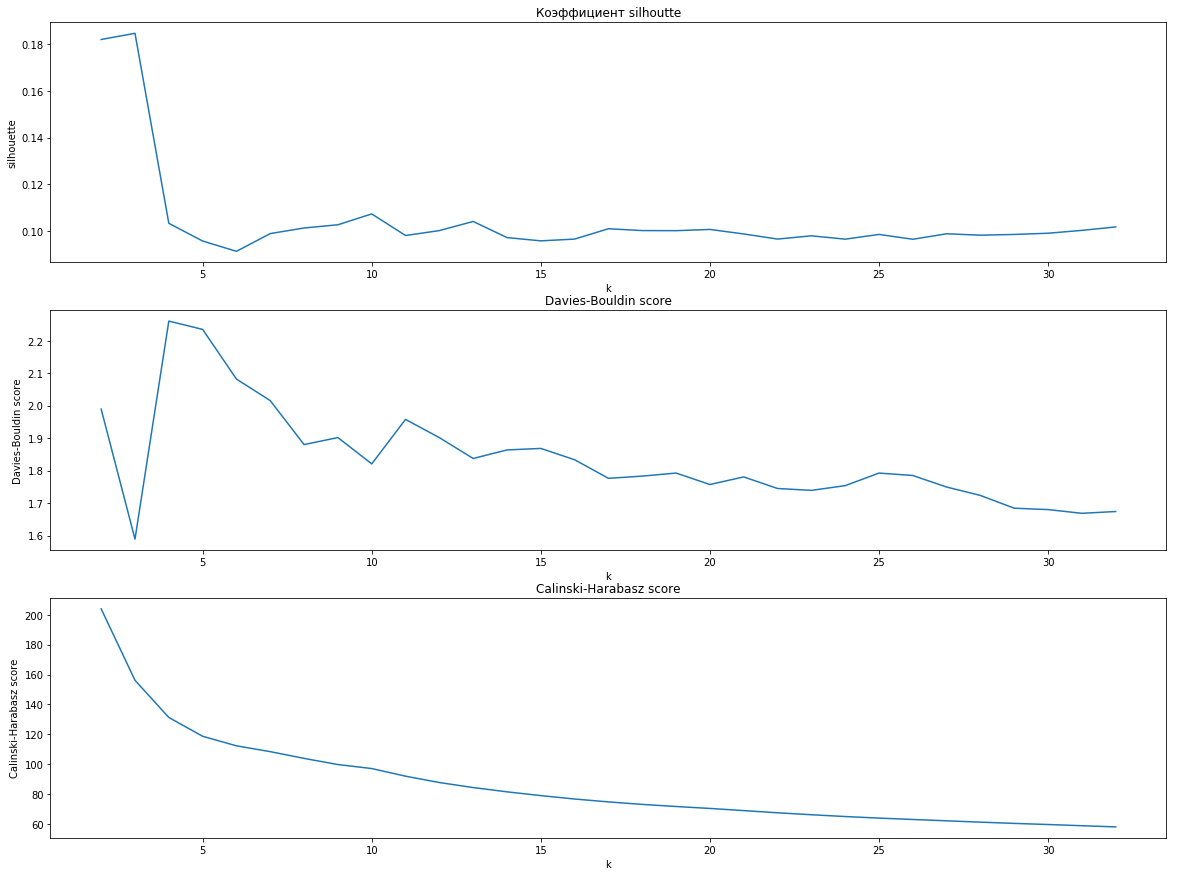

In [33]:
silhouette_array = []
davies_bouldin_array = []
calinski_harabasz_array = []

range_n_clusters = range(2, 33)

for k in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=k)
    labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    dvs_bldn_csore = davies_bouldin_score(X, labels)
    clnsk_hrb_score = calinski_harabasz_score(X, labels)
    
    silhouette_array.append(silhouette_avg)    
    davies_bouldin_array.append(dvs_bldn_csore)
    calinski_harabasz_array.append(clnsk_hrb_score)
    
    #print("Для k =", k, "Средний коэффициент silhouette:", silhouette_avg)
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(20, 15)

ax1.plot(range_n_clusters, silhouette_array)
ax1.set_xlabel('k')
ax1.set_ylabel('silhouette')
ax1.set_title('Коэффициент silhoutte')

ax2.plot(range_n_clusters, davies_bouldin_array)
ax2.set_xlabel('k')
ax2.set_ylabel('Davies-Bouldin score')
ax2.set_title('Davies-Bouldin score')

ax3.plot(range_n_clusters, calinski_harabasz_array)
ax3.set_xlabel('k')
ax3.set_ylabel('Calinski-Harabasz score')
ax3.set_title('Calinski-Harabasz score')

plt.show()

In [34]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [35]:
distance_mat = pdist(scaled_data) # pdist посчитает нам верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(scaled_data, 'ward') # linkage — реализация агломеративного алгоритма

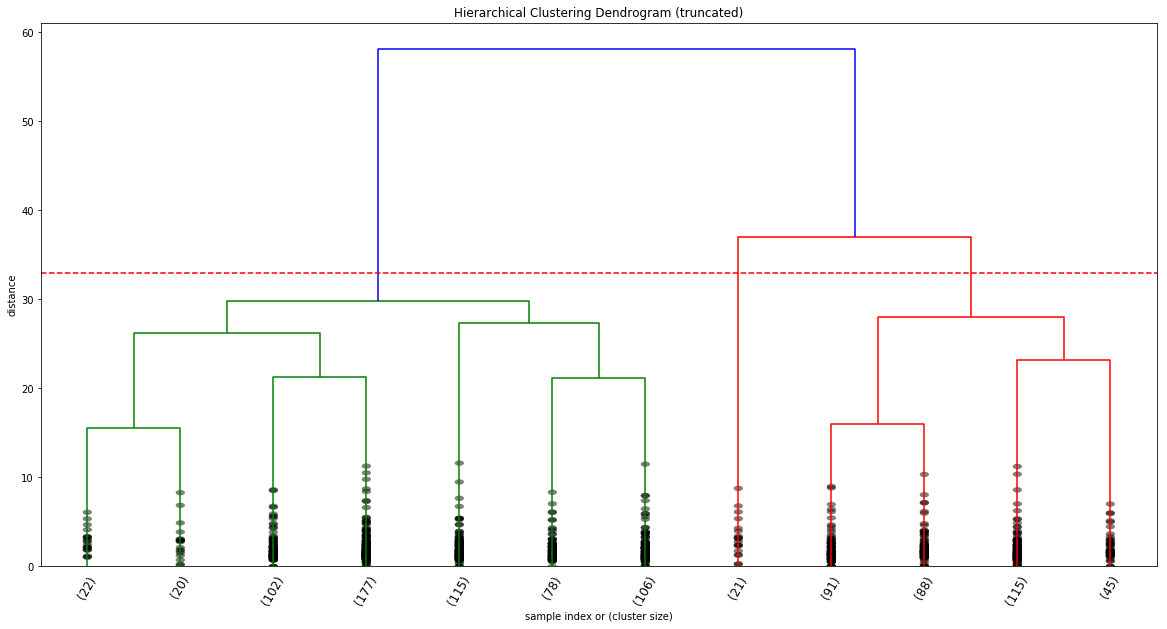

In [36]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=60.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.axhline(y=33, c='r', linestyle='--')
plt.show()

## Есть основания предполагать наличие 3-ёх кластеров: обе модели (K-means и Agglomerative) показали макcимум критерия silhouette и мининмум критерия Davies-Bouldin при k=3.

### Оценим, отражает ли предлагаемое разбиение на кластеры свойства параметров.

## K-Means

In [37]:
clusterer = KMeans(n_clusters=3, random_state=1812, init='k-means++')
labels = clusterer.fit_predict(scaled_data)

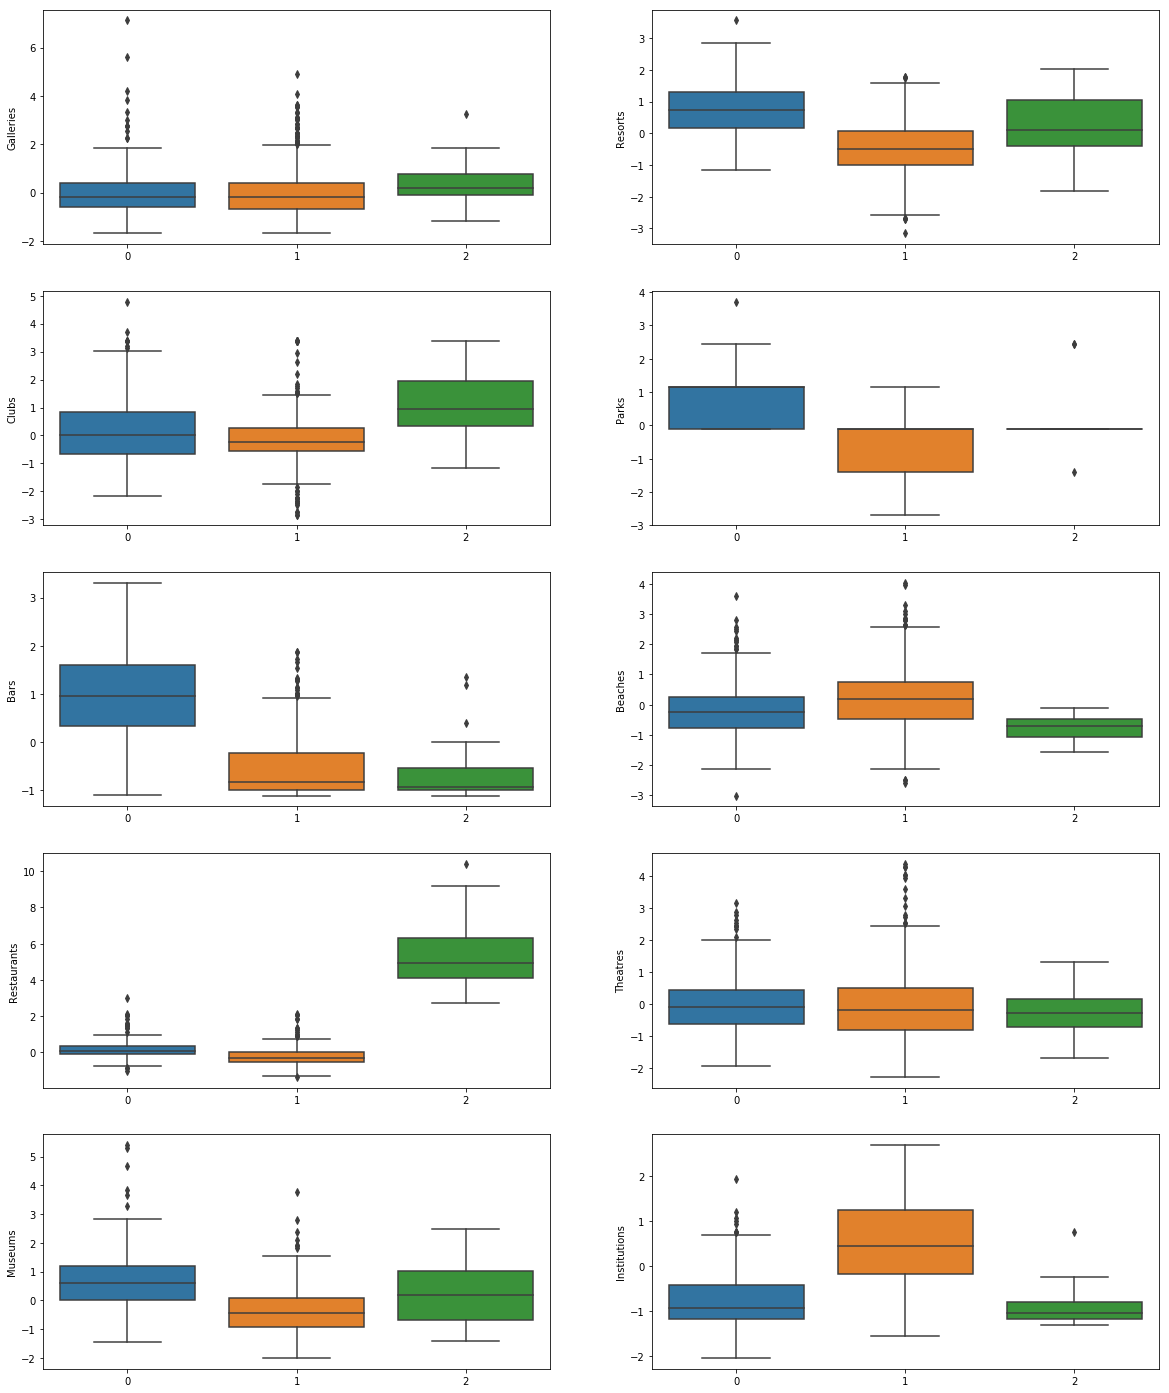

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

i_col = 0
i_row = 0

for column in scaled_data.columns:
    sns.boxplot(y=column, x=labels, data=scaled_data, ax=ax[i_row, i_col])
    if i_row < 4:
        i_row += 1
    else:
        i_col += 1
        i_row = 0

In [39]:
labeled_data = scaled_data.copy(deep=True)
labeled_data['labels'] = labels

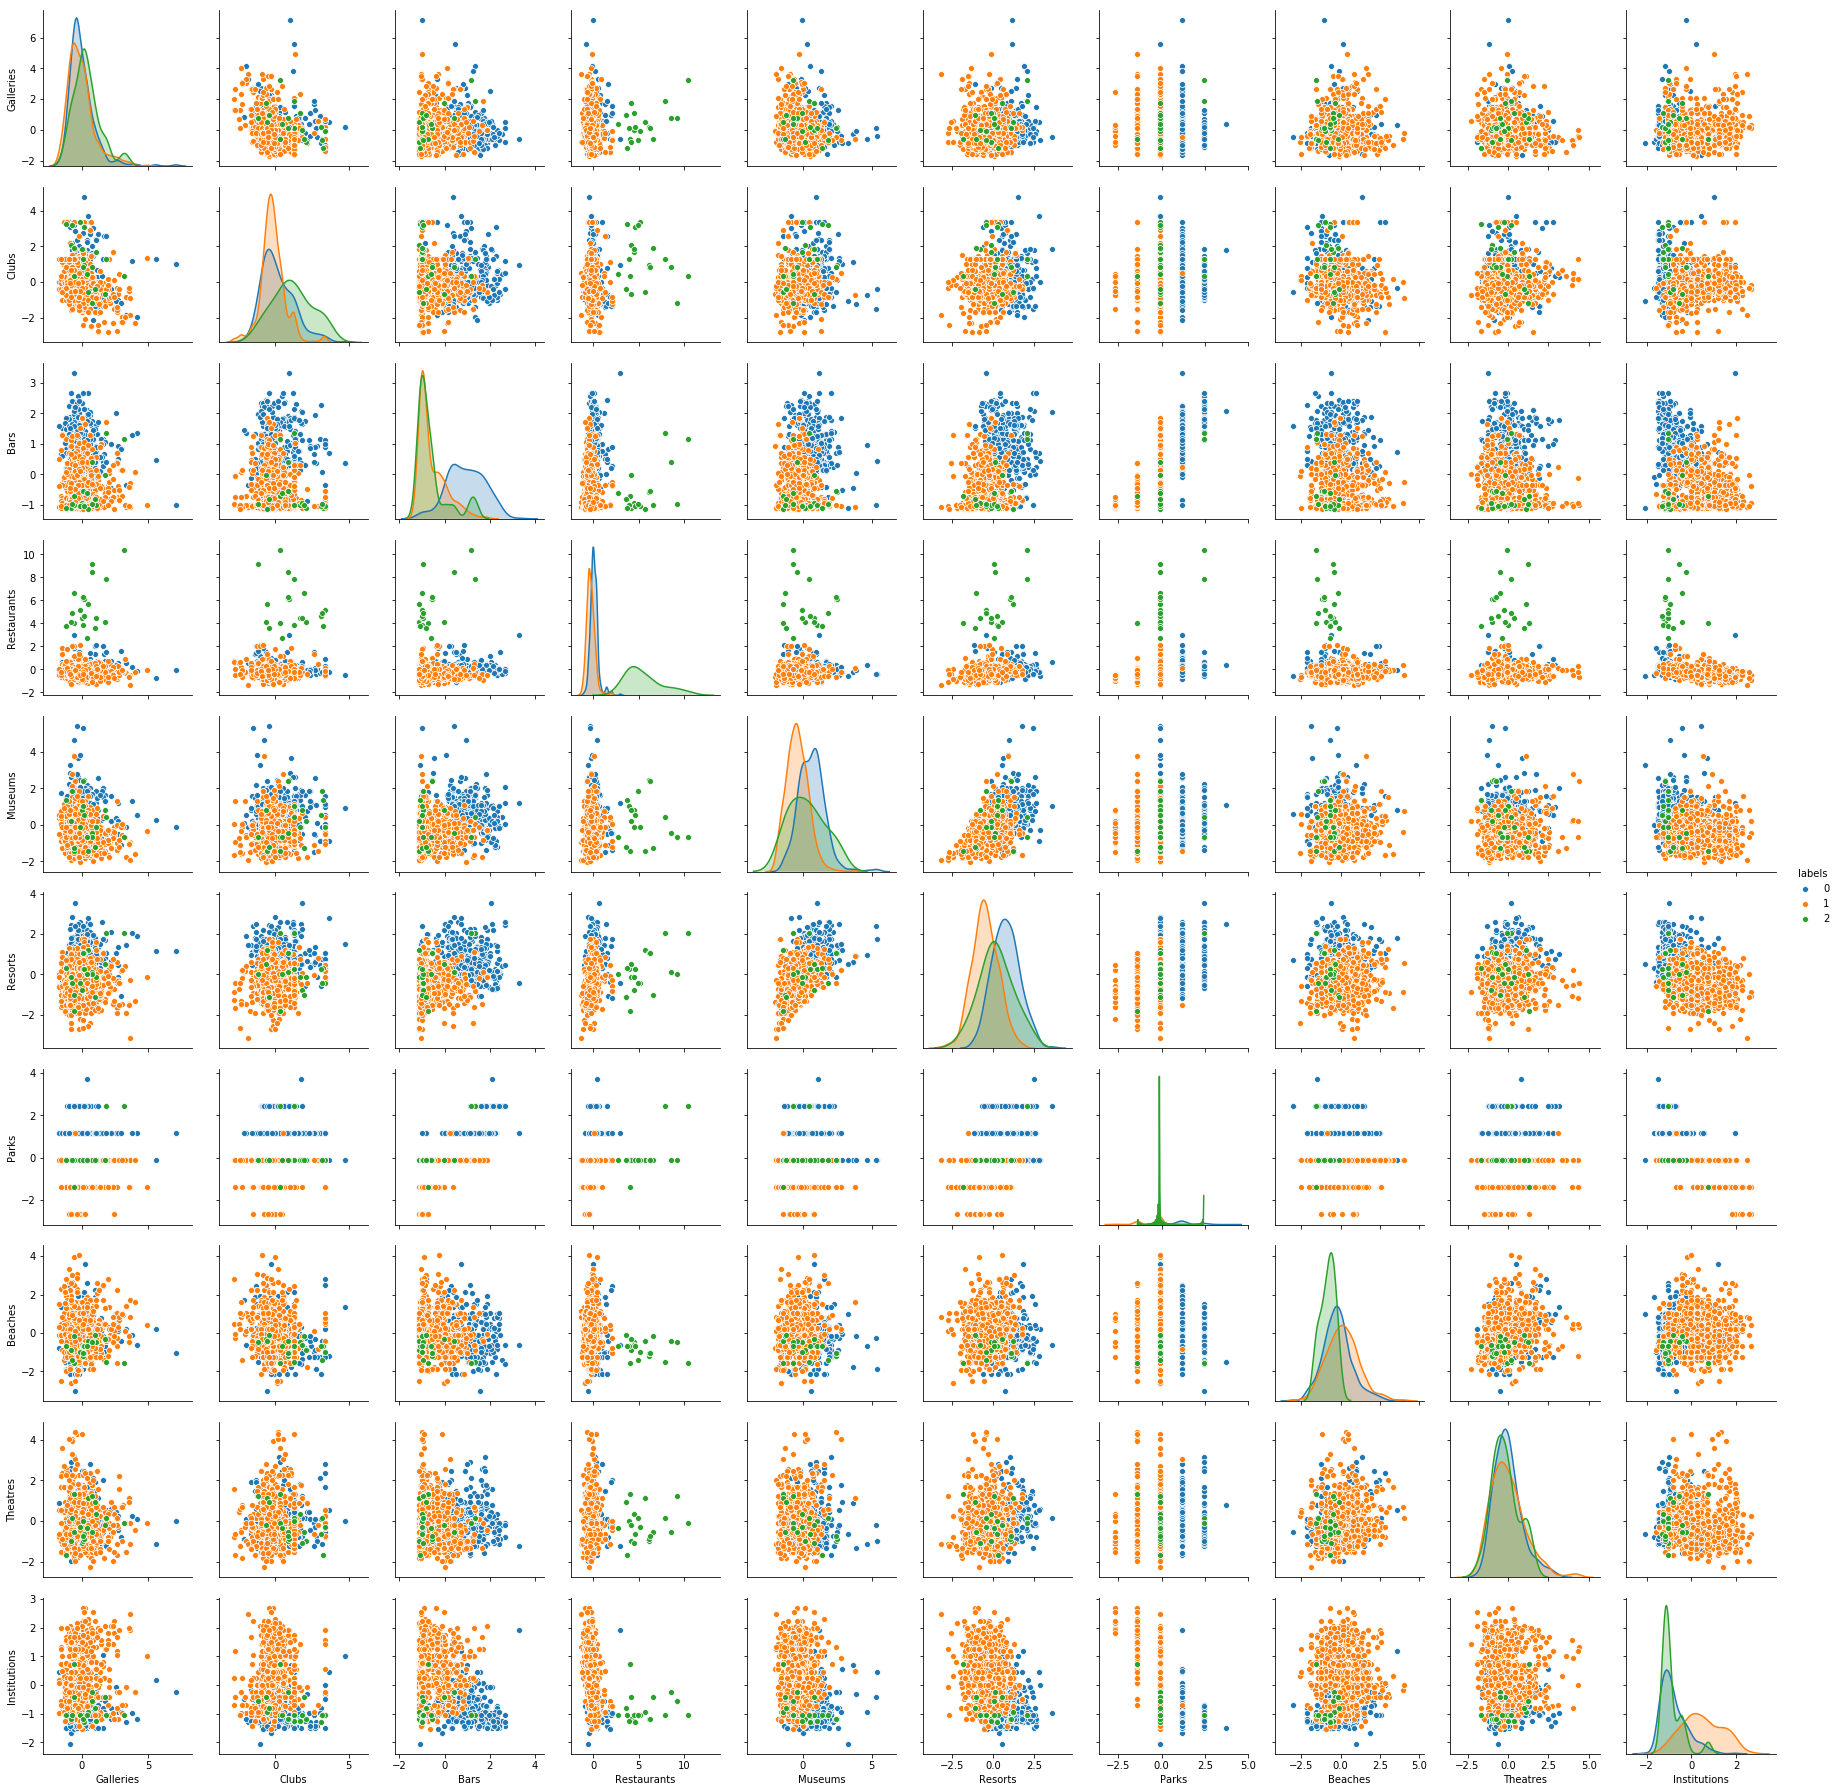

In [40]:
sns.pairplot(data=labeled_data, vars=scaled_data.columns, hue='labels')

## Иерархическая кластеризация

In [41]:
clusterer = AgglomerativeClustering(n_clusters=3)
labels = clusterer.fit_predict(scaled_data)

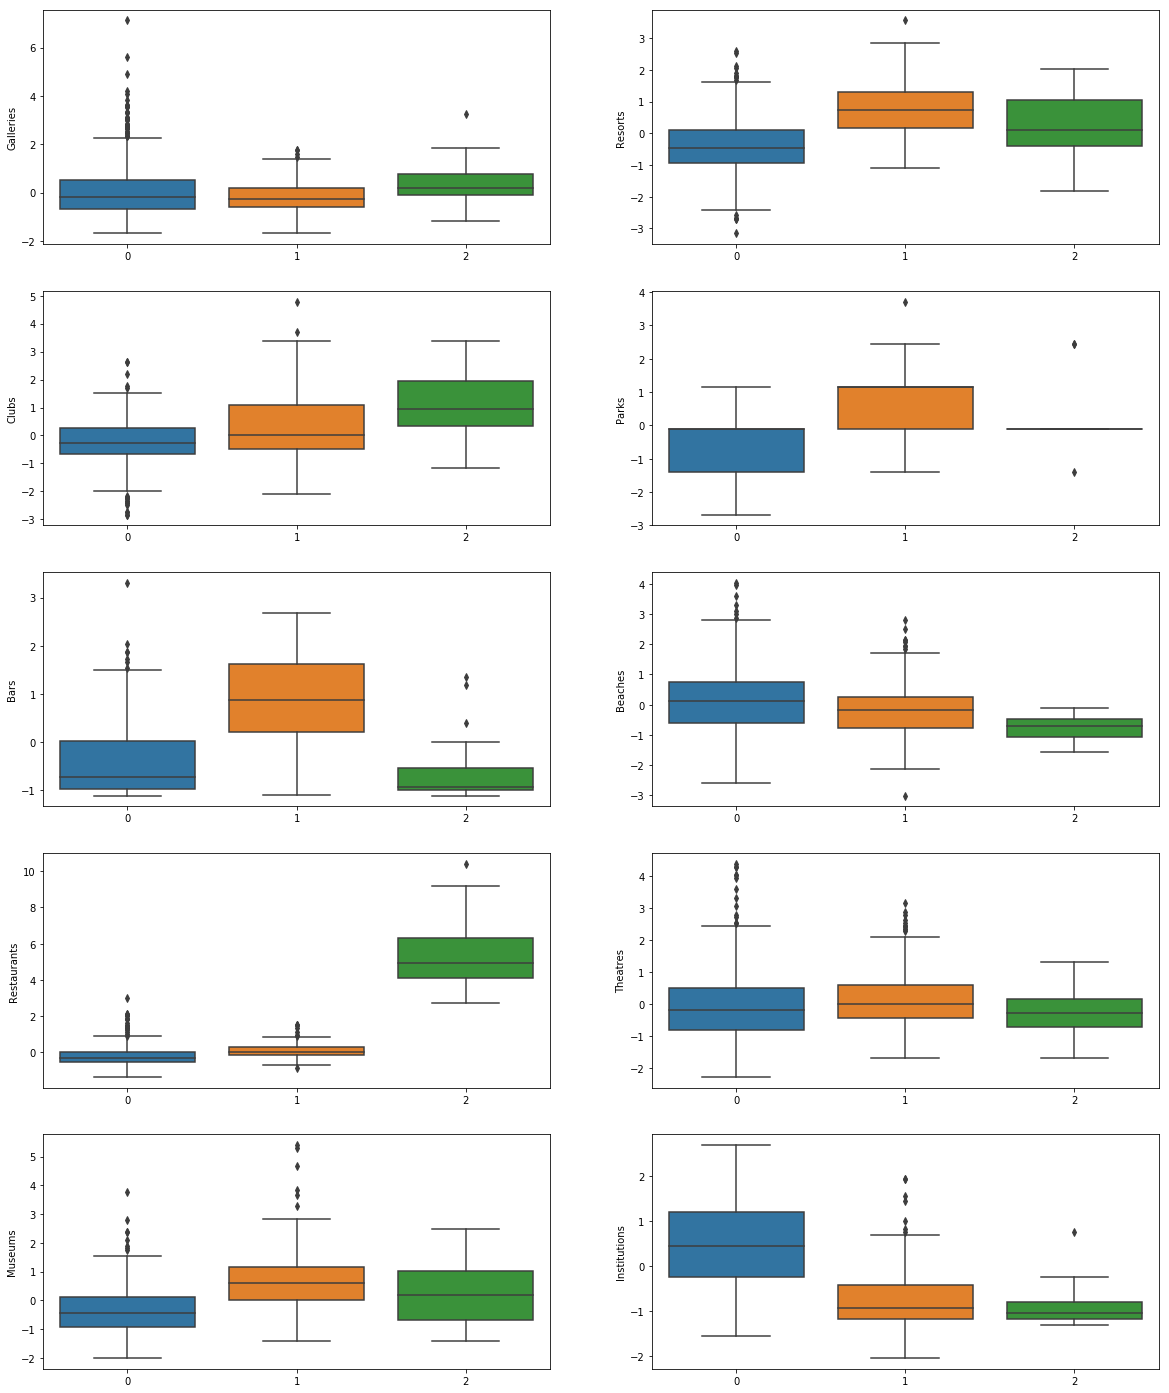

In [42]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

i_col = 0
i_row = 0

for column in scaled_data.columns:
    sns.boxplot(y=column, x=labels, data=scaled_data, ax=ax[i_row, i_col])
    if i_row < 4:
        i_row += 1
    else:
        i_col += 1
        i_row = 0

In [43]:
labeled_data = unprocessed_data.copy(deep=True)
labeled_data['labels'] = labels

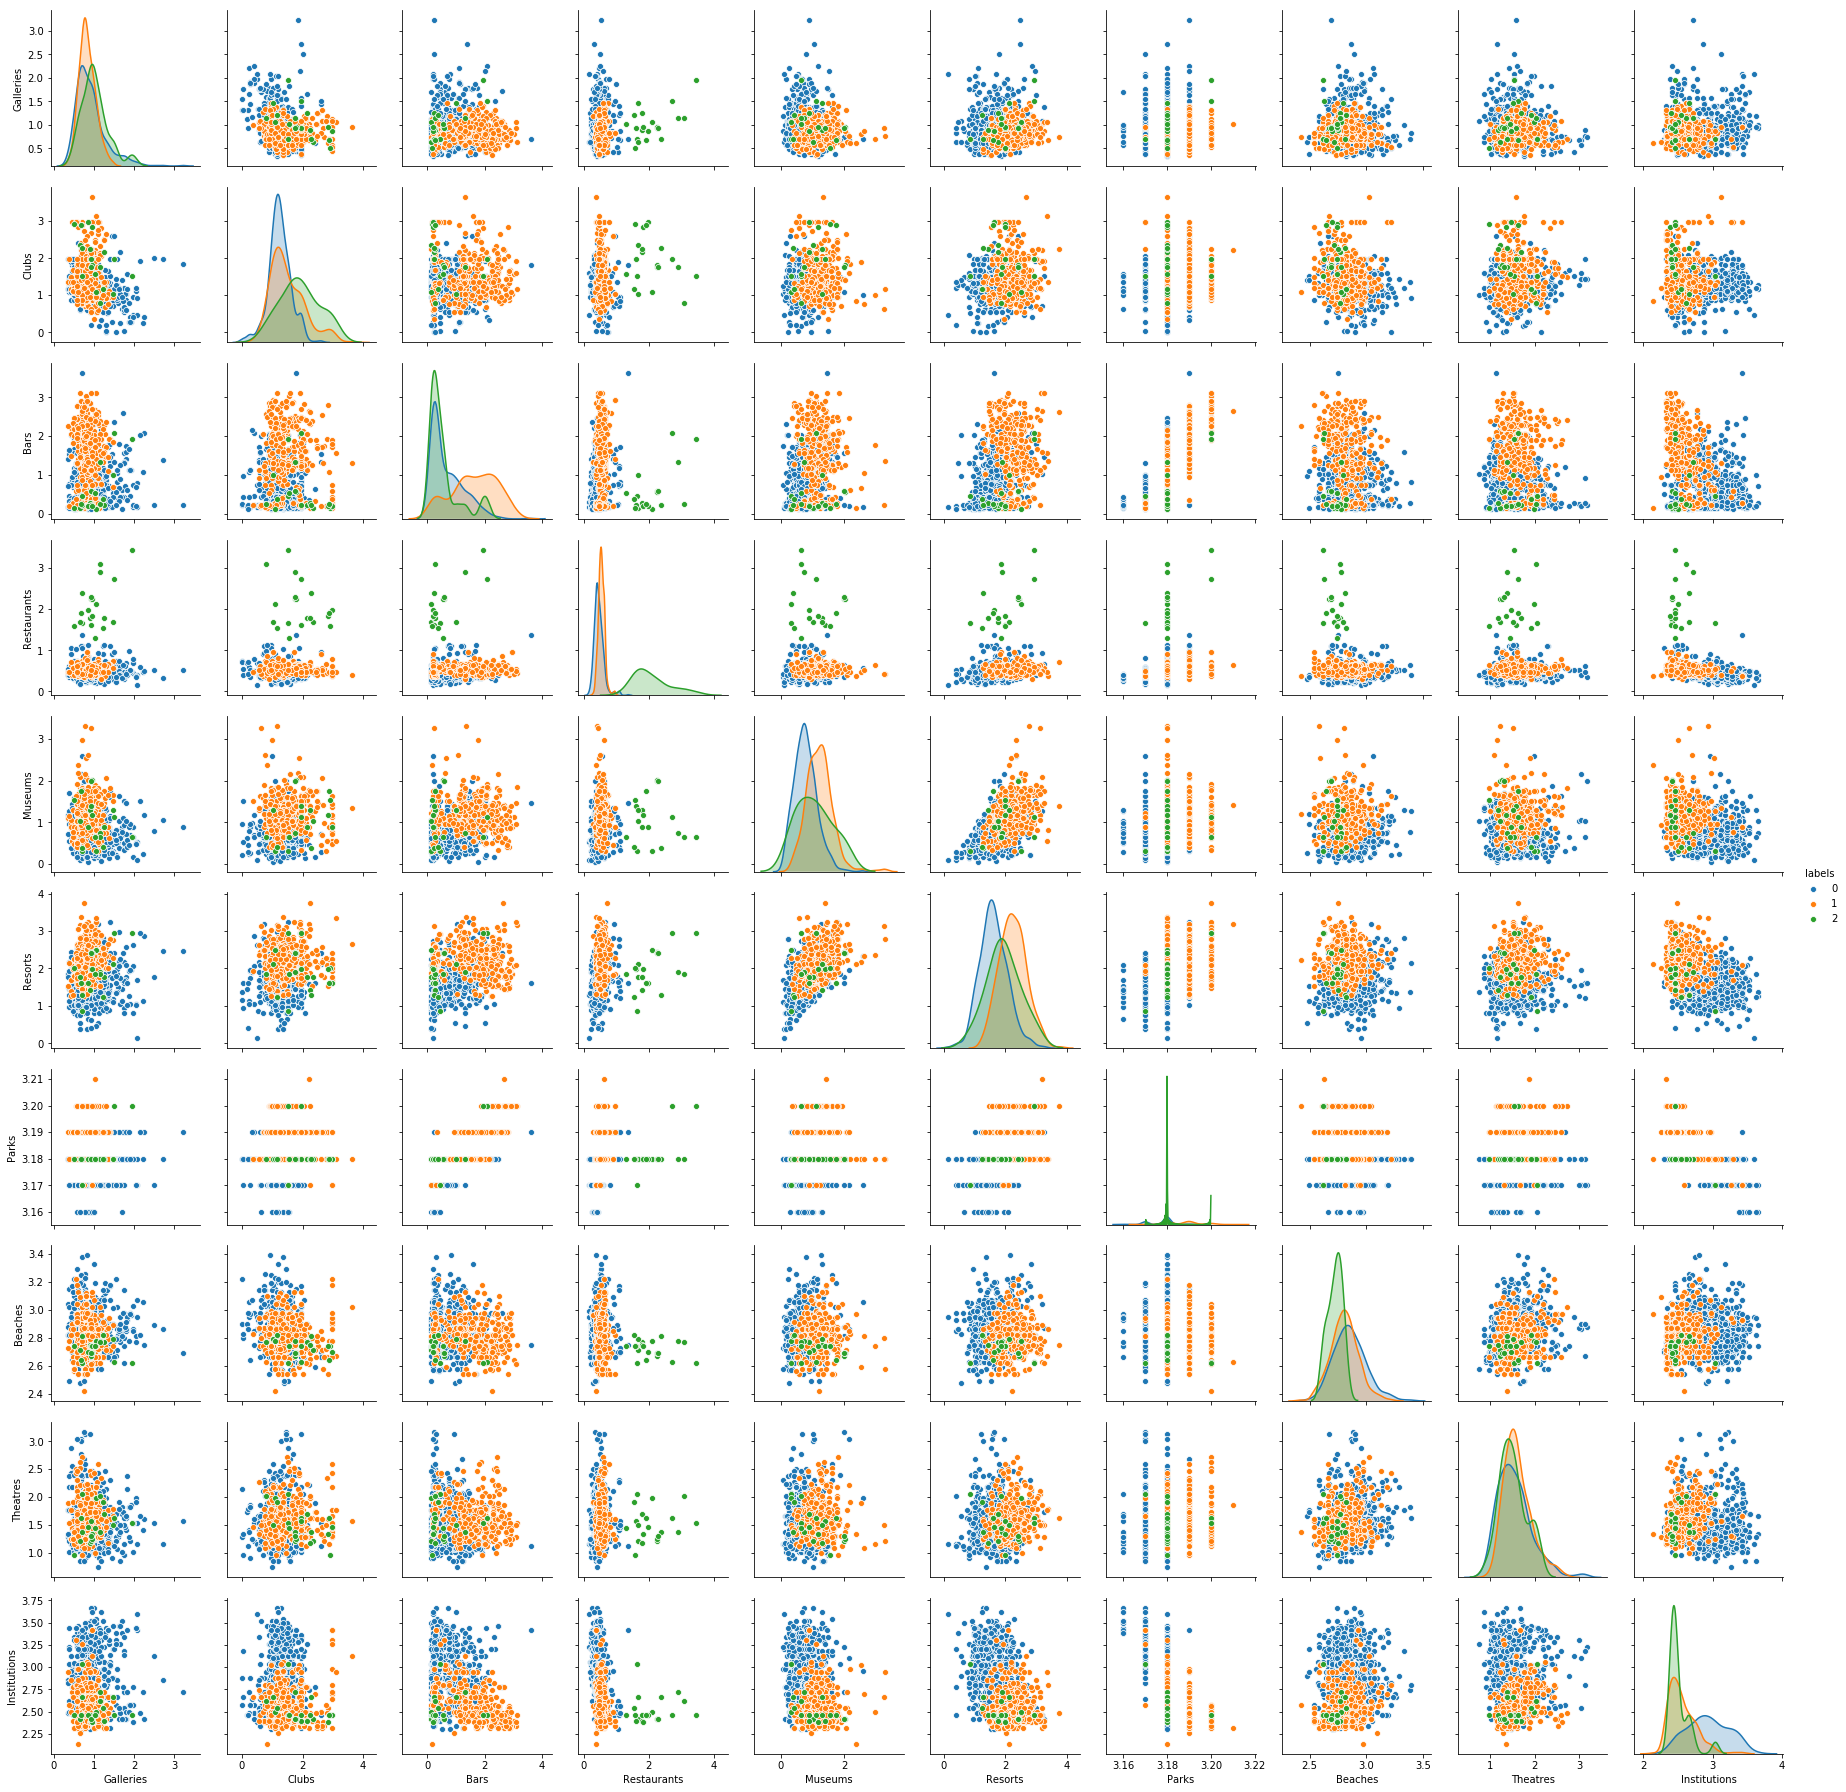

In [44]:
sns.pairplot(data=labeled_data, vars=unprocessed_data.columns, hue='labels')

## Действительно, многие параметры (за исключением оценок по пляжам и театрам) показали разделимость значений по 3-ём классам.
## <font color=red>ГИПОТЕЗЫ (туристические направления в юго-восточной Азии):</font>
## - отзывы могут кластеризироваться по категориям "звёздности"  * * *, * * * * , * * * * *
## - отзывы могут кластеризироваться по географическому признаку - например, острова (Бали, Мальдивы), Китай/Вьетнам, Тайланд
## - отзывы могут кластеризоваться по категориям туризма - например, пляжный, событийный, гастрономический

In [45]:
pd.Series(labels).value_counts()

0    620
1    339
2     21
dtype: int64

## DB Scan

In [46]:
from sklearn.cluster import DBSCAN

In [95]:
X = scaled_data

In [96]:
db_clusterer = DBSCAN(eps=2, min_samples=7, metric='manhattan').fit(X)
labels = pd.Series(db_clusterer.labels_)

In [97]:
labels.value_counts()

-1    964
 0     16
dtype: int64

In [98]:
labeled_data = unprocessed_data.copy(deep=True)
labeled_data['labels'] = labels

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


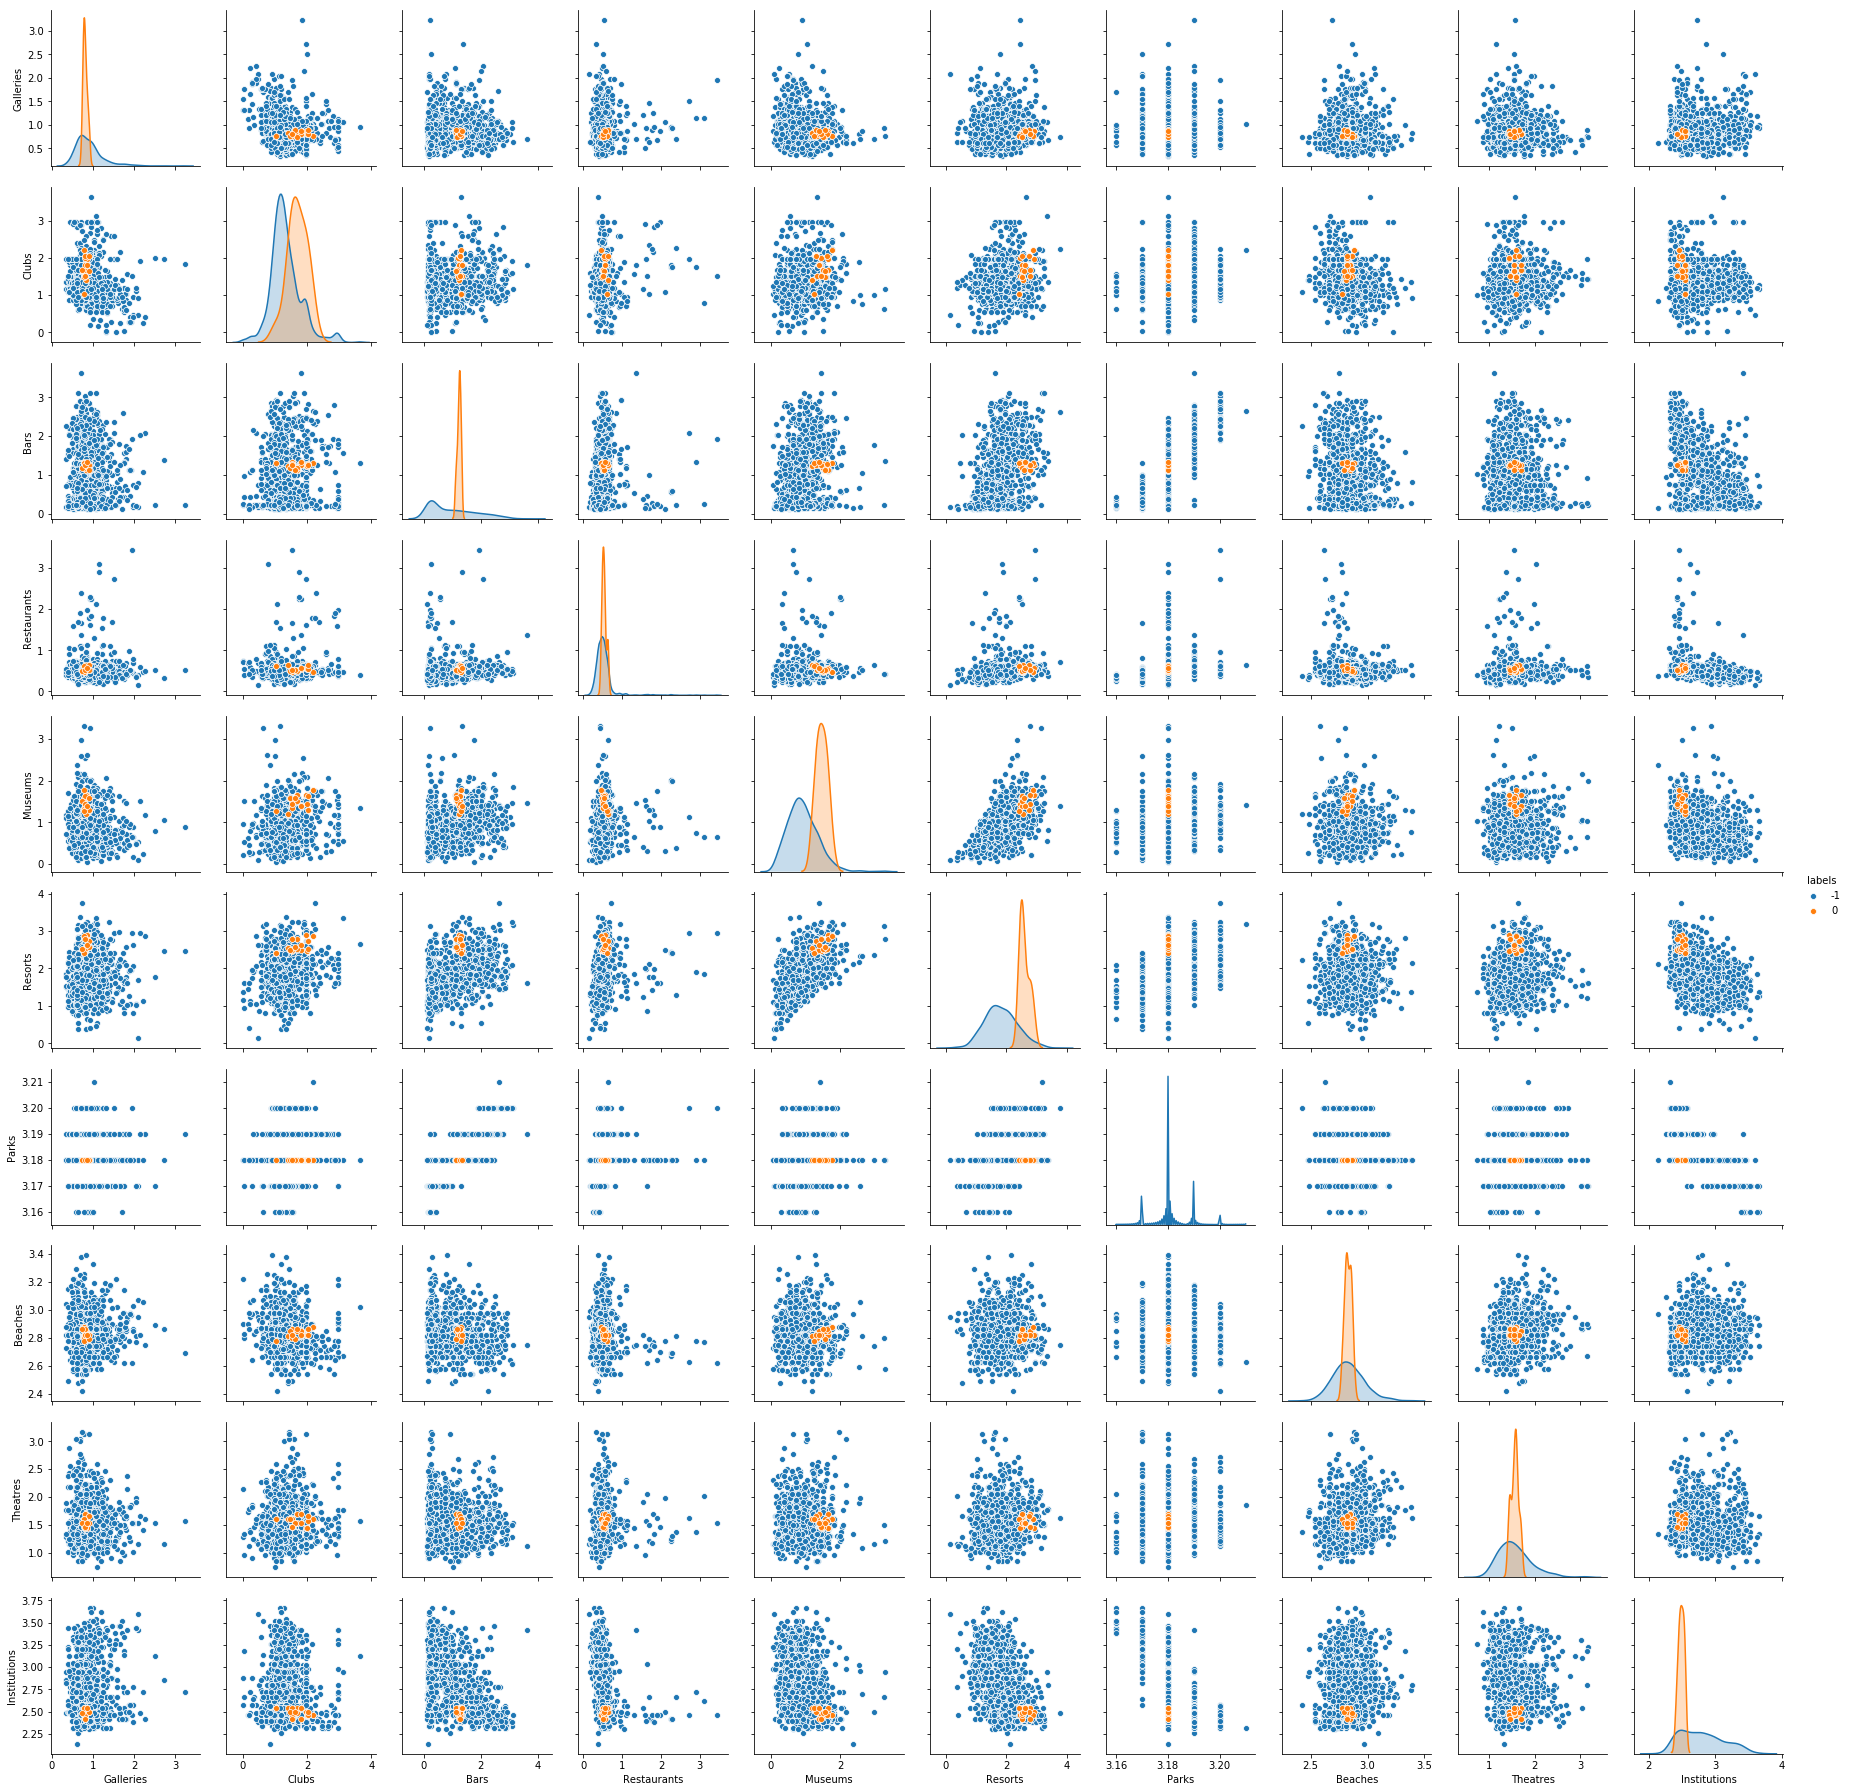

In [99]:
sns.pairplot(data=labeled_data, vars=unprocessed_data.columns, hue='labels')

## Понижение размерности - TSNE

In [100]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=21, random_state=30)

tsne_transformed = tsne.fit_transform(scaled_data)

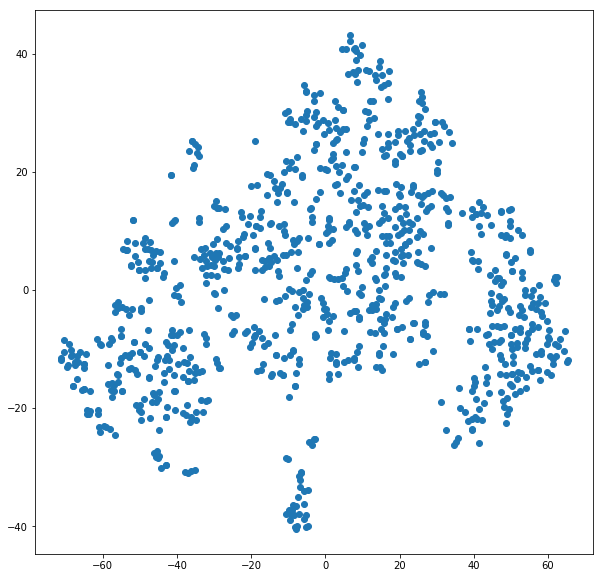

In [101]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

## <font color=red>Подбор параметров алгоритмов DBScan и TSNE не дал интерпретируемых результатов.</font>

## K-Medoids (PAM)

In [102]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [103]:
# Set random initial medoids.
initial_medoids = [1, 500]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(X.values.tolist(), initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

In [104]:
len(clusters)

2

In [105]:
labels=np.zeros(len(X))
for cluster_index, cluster in enumerate(clusters):
    for index in cluster:
        labels[index]=cluster_index
labels = pd.Series(labels)
labels.value_counts()

1.0    737
0.0    243
dtype: int64

In [106]:
labeled_data = scaled_data.copy(deep=True)
labeled_data['labels'] = labels

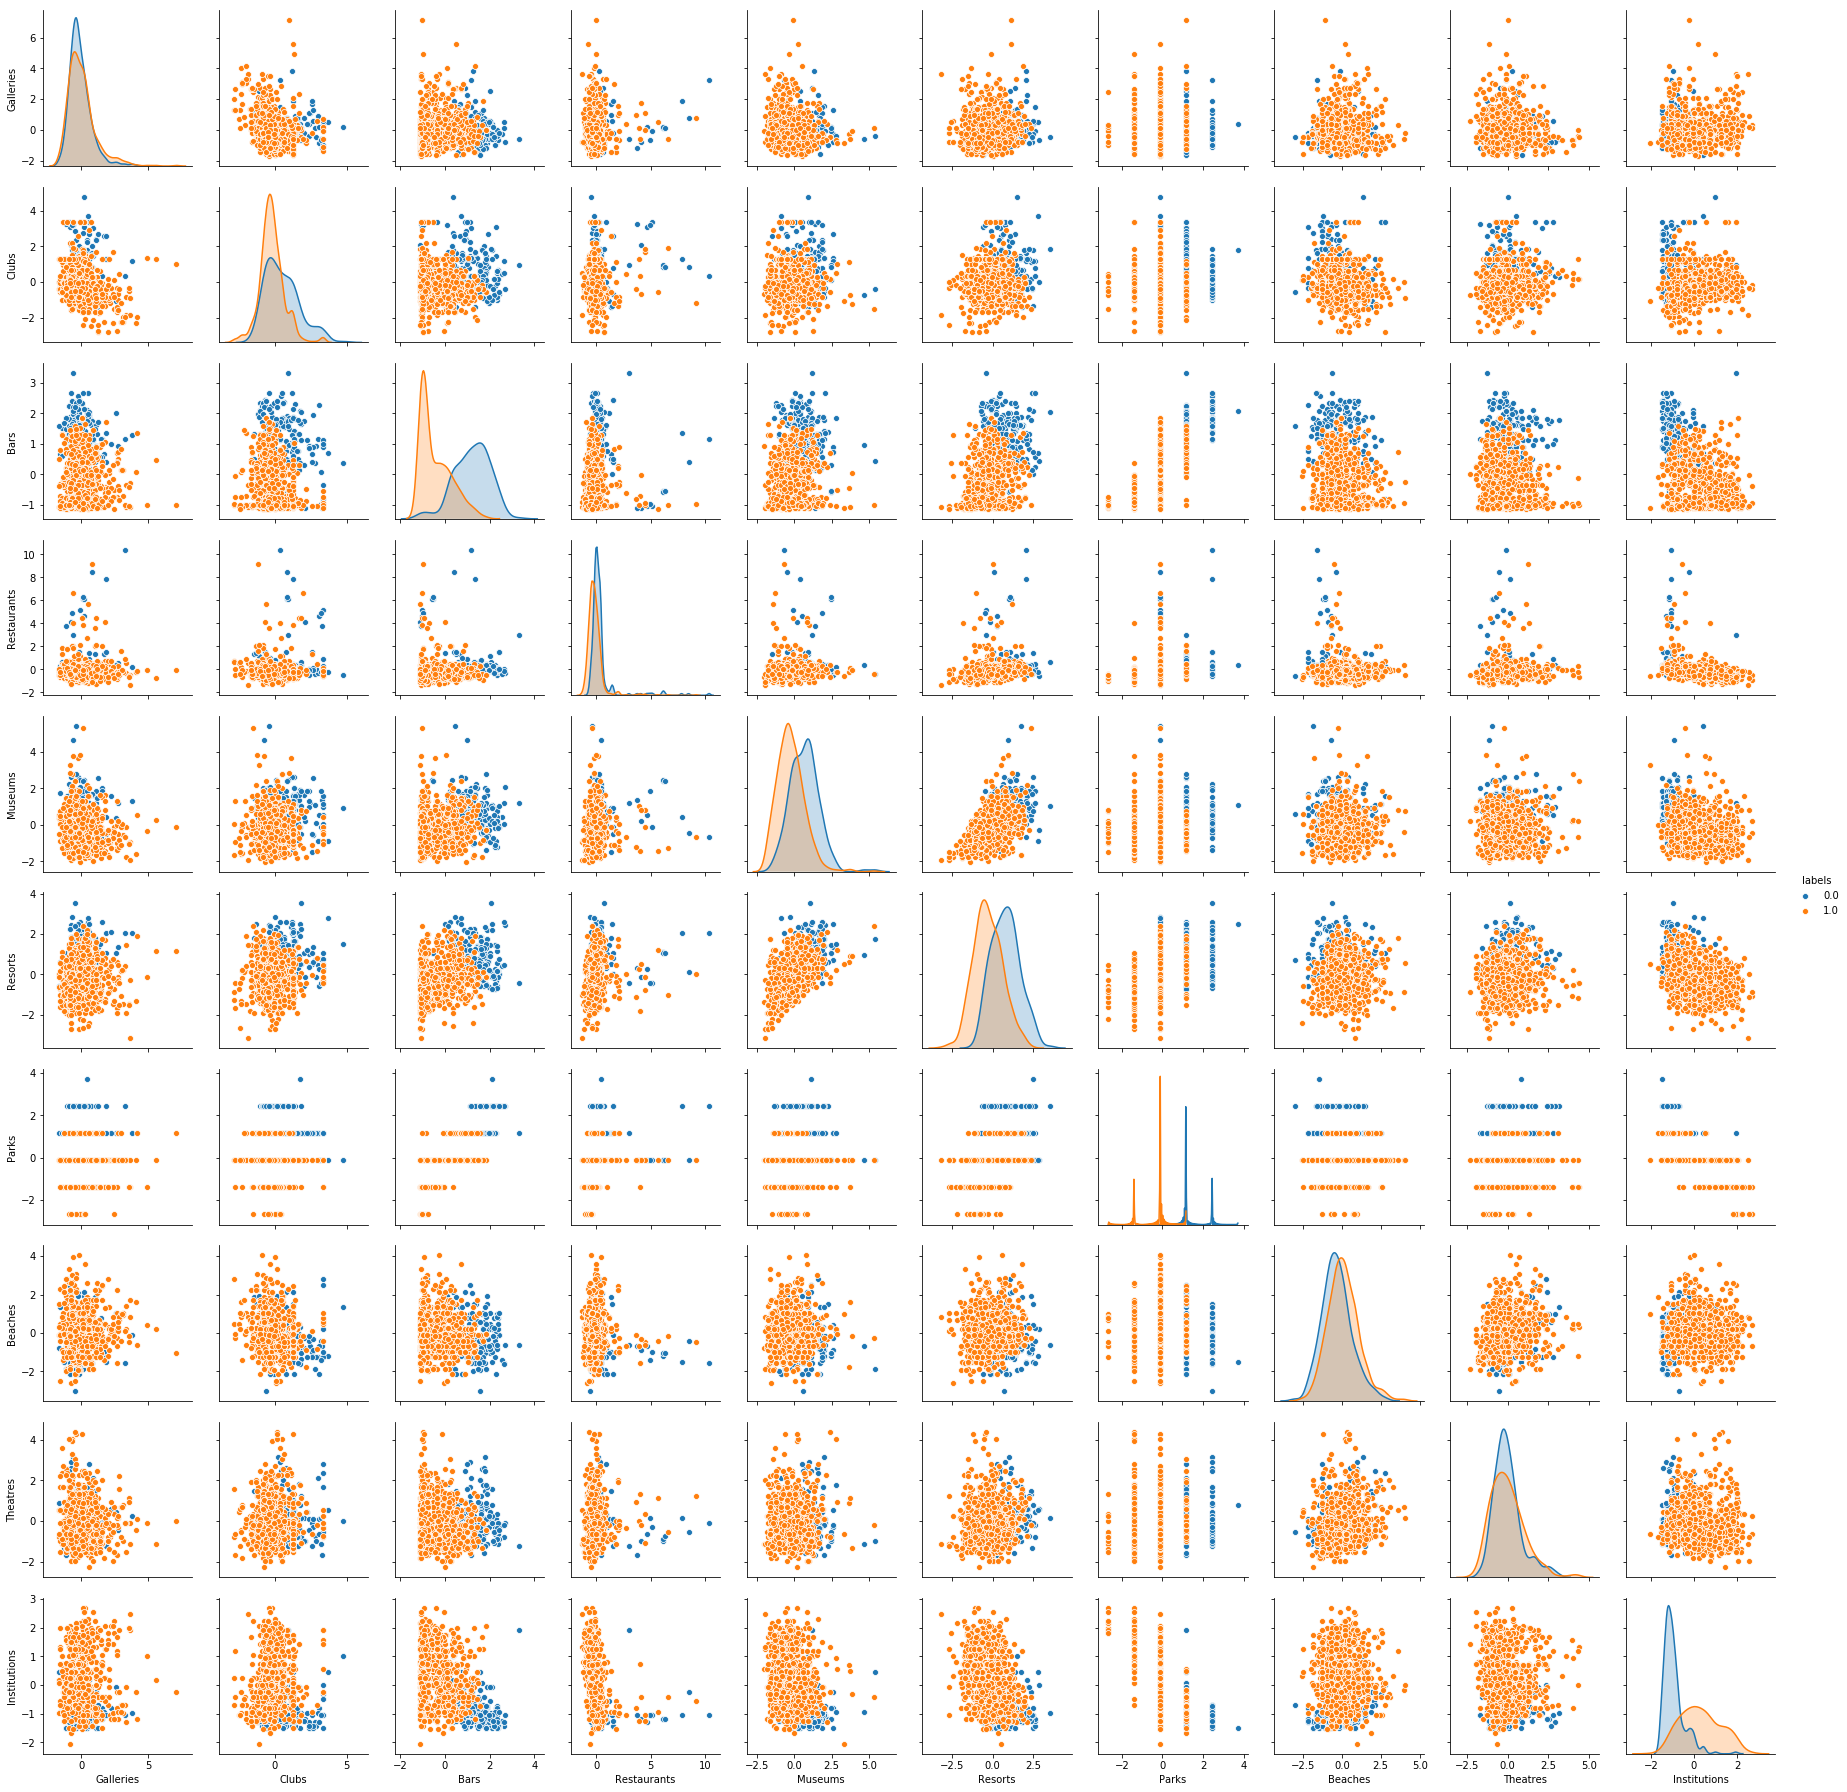

In [107]:
sns.pairplot(data=labeled_data, vars=scaled_data.columns, hue='labels')

## Алгоритм k-medoids обнаружил 2 кластера. Это разбиение близко к тому, которое дал алгоритм k-means. Но 3-ий, самый малочисленный кластер, остался "незамеченным".